**Unzipping a zip file**

In [ ]:
!gdown --id 1PozRNI9Bub7QLOihGHPXPAAgOhrCnKLB

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1PozRNI9Bub7QLOihGHPXPAAgOhrCnKLB 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/20_newsgroups.zip

Streaming output truncated to the last 5000 lines.
  inflating: 20_newsgroups/soc.religion.christian/20362  
  inflating: 20_newsgroups/soc.religion.christian/20363  
  inflating: 20_newsgroups/soc.religion.christian/20364  
  inflating: 20_newsgroups/soc.religion.christian/20365  
  inflating: 20_newsgroups/soc.religion.christian/20487  
  inflating: 20_newsgroups/soc.religion.christian/20488  
  inflating: 20_newsgroups/soc.religion.christian/20489  
  inflating: 20_newsgroups/soc.religion.christian/20490  
  inflating: 20_newsgroups/soc.religion.christian/20491  
  inflating: 20_newsgroups/soc.religion.christian/20492  
  inflating: 20_newsgroups/soc.religion.christian/20493  
  inflating: 20_newsgroups/soc.religion.christian/20494  
  inflating: 20_newsgroups/soc.religion.christian/20495  
  inflating: 20_newsgroups/soc.religion.christian/20496  
  inflating: 20_newsgroups/soc.religion.christian/20497  
  inflating: 20_newsgroups/soc.religion.christian/20498  
  inflating: 20_newsg

**Importing libraries**

In [ ]:
import os
import pandas as pd

**Getting categories in a list**

In [ ]:
categories = list(os.listdir('/content/20_newsgroups'))

**Fetching content of documents in file_contents**

In [ ]:
file_contents = []
category_col = []
for category in categories:
  file_names = list(os.listdir(f'/content/20_newsgroups/{category}'))
  for file_name in file_names: 
    try: 
      #f = open(f'/content/20_newsgroups/{category}/{file_name}')
      with open(f'/content/20_newsgroups/{category}/{file_name}', 'r') as file:
        f = file.read().replace('\n', '')
      file_contents.append(f)
      category_col.append(category)
    except: print(file_name)

83777
83651
82776
53803
54485
53721
54071
53883
54070
67305
66871
68001
66923
76112
76548
76843
76361
61116
60936
60366
60868
60498
59055
59239
59535
51594
52164
52165
51591
52196
51917
51916
51892
51592
50467
51865
51904
51593
52033
51941
61556
61293
61534
52910
49960
54163
52909
51060
54164
52499
101596
103725
103700
103694
104419
104572
104562
104471
104474
104352
104984
54516
54000
54042
54769
53879
54036
15672
38568
38490
38757
38291
38489


**Creating DataFrame**

In [ ]:
df = pd.DataFrame(category_col)
df["Content"] = file_contents
df.rename(columns = {0: 'Categories'}, inplace = True)

**Text Preprocessing**

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Punctuations**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**Stemming**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

**A function named transform_text to remove stopwords, remove punctuations and apply stemming**

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df['transformed_text'] = df['Content'].apply(transform_text)

In [ ]:
df

,Categories,Content,transformed_text
0,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,xref ub csn cheroke stevenfrom steven steve no...
1,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref gatech purdu smullinsfrom smullin scott h...
2,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...,xref dmeierfrom dmeier dougla meier subject me...
3,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,xref rochest udel wupost wvhornfrom wvhorn wil...
4,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref wupost alexia cobbfrom cobb mike cobb sub...
...,...,...,...
19919,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.binaries.p...,xref rochest udel lmp8913from lmp8913 preston ...
19920,comp.graphics,Newsgroups: comp.graphicsPath: cantaloupe.srv....,newsgroup agat linu philab kktfrom kkt tan sub...
19921,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.bbs.ads:20...,xref gatech rutger newsfrom robot post menac n...
19922,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.binaries.p...,xref rochest rit moscom mzfrom mz matthew zenk...


In [ ]:
df1=df
df1

,Categories,Content,transformed_text
0,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,xref ub csn cheroke stevenfrom steven steve no...
1,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref gatech purdu smullinsfrom smullin scott h...
2,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...,xref dmeierfrom dmeier dougla meier subject me...
3,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,xref rochest udel wupost wvhornfrom wvhorn wil...
4,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref wupost alexia cobbfrom cobb mike cobb sub...
...,...,...,...
19919,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.binaries.p...,xref rochest udel lmp8913from lmp8913 preston ...
19920,comp.graphics,Newsgroups: comp.graphicsPath: cantaloupe.srv....,newsgroup agat linu philab kktfrom kkt tan sub...
19921,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.bbs.ads:20...,xref gatech rutger newsfrom robot post menac n...
19922,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.binaries.p...,xref rochest rit moscom mzfrom mz matthew zenk...


**Label Encoder for encoding categories**

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['encoded_category']= label_encoder.fit_transform(df['Categories'])
df['encoded_category'].unique()
df

,Categories,Content,transformed_text,encoded_category
0,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,xref ub csn cheroke stevenfrom steven steve no...,19
1,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref gatech purdu smullinsfrom smullin scott h...,19
2,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...,xref dmeierfrom dmeier dougla meier subject me...,19
3,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,xref rochest udel wupost wvhornfrom wvhorn wil...,19
4,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref wupost alexia cobbfrom cobb mike cobb sub...,19
...,...,...,...,...
19919,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.binaries.p...,xref rochest udel lmp8913from lmp8913 preston ...,1
19920,comp.graphics,Newsgroups: comp.graphicsPath: cantaloupe.srv....,newsgroup agat linu philab kktfrom kkt tan sub...,1
19921,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.bbs.ads:20...,xref gatech rutger newsfrom robot post menac n...,1
19922,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu alt.binaries.p...,xref rochest rit moscom mzfrom mz matthew zenk...,1


**Data Visualization**

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

**Wordcloud generation of category0**

In [ ]:
category0 = wc.generate(df[df['encoded_category'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
import matplotlib.pyplot as plt

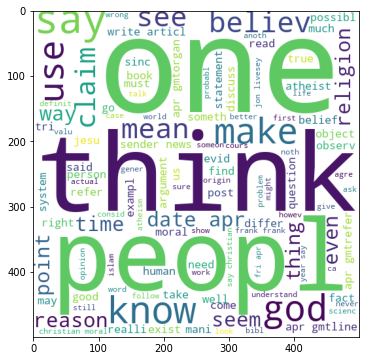

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(category0)

In [ ]:
category0_corpus = []
for msg in df[df['encoded_category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        category0_corpus.append(word)

In [ ]:
len(category0_corpus)

157695

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


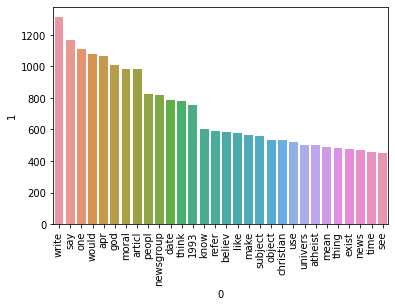

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(category0_corpus).most_common(30))[0],pd.DataFrame(Counter(category0_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**Pie chart visualization of no. of documents in each categories**

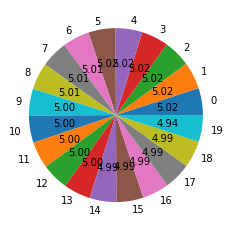

In [ ]:
plt.pie(df['encoded_category'].value_counts(), labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'], autopct="%0.2f")
plt.show()

**Normal training of model( direct spliiting into train and test)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(19919, 3000)

In [ ]:
y = df['encoded_category'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='macro'))

0.6511044176706827
[[150   1   1   1   0   0   0   2   1   1   0   1   0   2   0   4   4   4
    6  20]
 [  0  63  23  12   8  49   7   0   0   2   0   3   5   5   5   0   1   0
    1   0]
 [  0   7  84  31  12  31  10   0   1   0   0   2   6   1   2   0   1   0
    0   0]
 [  0   4  15 110  10   5  13   1   1   1   0   2   7   0   0   0   0   1
    0   0]
 [  0   8  10   8 124   5   9   1   1   1   0   0   7   2   0   0   0   0
    0   0]
 [  0  26  16   5   6 146   2   1   1   0   1   2   2   4   3   0   0   0
    1   0]
 [  1   6  12  26  23   0  75   3   5   5   1   1  13   1   5   0   2   0
    2   0]
 [  1   1   1   4   9   4  17 106  23   4   1   0  12   0   4   0   5   1
    2   2]
 [  0   0   2   1   1   1   8  18 161   0   0   0   4   4   4   0   1   1
    4   1]
 [  0   0   2   0   1   2   5   2   4 146   8   0   1   4   5   0   1   1
    3   2]
 [  1   1   0   0   0   0   2   0   0  22 176   0   0   2   2   0   2   2
    4   0]
 [  4   0   3   1   3   2   1   1   0   6   0 

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, average='macro'))

0.8087349397590361
[[151   0   1   0   0   0   0   0   4   0   0   0   1   4   0   4   2   6
    1  24]
 [  0 142  17   3   1  12   1   1   0   1   0   1   3   2   0   0   0   0
    0   0]
 [  0  11 150  16   2   6   2   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  1   1  15 131   5   0   8   1   0   1   0   1   6   0   0   0   0   0
    0   0]
 [  0   3   8  14 134   2   7   3   0   0   0   0   4   1   0   0   0   0
    0   0]
 [  0  23  13   4   0 170   1   2   0   0   1   0   2   0   0   0   0   0
    0   0]
 [  0   4   3  11   4   1 144   2   3   1   0   0   5   2   0   0   0   0
    0   1]
 [  1   1   1   0   0   1   8 166   4   1   1   0   6   0   1   0   3   1
    1   1]
 [  0   0   2   0   0   3   4   6 190   2   0   0   1   1   1   0   0   0
    1   0]
 [  2   1   1   0   0   1   1   1   0 174   5   1   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3   2   5 202   0   0   1   0   0   0   0
    0   0]
 [  0   5   2   0   3   0   2   1   0   2   0 

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average='macro'))

0.7100903614457831
[[138   0   1   0   4   0   6   0  16   0   0   0   1   1   0   0   1   5
    2  23]
 [  0  98  28   5   9  13  21   0   0   0   0   4   2   1   3   0   0   0
    0   0]
 [  0   6 137  11   1  10  17   1   0   0   0   2   1   0   1   0   0   0
    1   0]
 [  0   0  13 113  16   0  20   1   1   0   0   2   4   0   0   0   0   0
    0   0]
 [  0   3   5   8 131   1  20   1   1   0   0   1   3   0   2   0   0   0
    0   0]
 [  0  11  19   1   1 162  16   1   0   0   0   4   0   1   0   0   0   0
    0   0]
 [  0   2   1   7   3   1 162   0   0   0   0   0   1   1   1   0   1   0
    1   0]
 [  0   0   2   2   3   0  34 138   5   0   0   0   3   0   0   0   3   0
    7   0]
 [  0   2   1   0   3   0  13   9 176   0   0   1   1   0   1   0   0   0
    4   0]
 [  1   0   0   1   2   0  24   0   2 148   4   0   0   1   0   0   0   0
    4   0]
 [  0   0   0   0   1   0  12   0   4   9 183   0   1   0   0   0   1   0
    3   0]
 [  0   2  10   1   8   1  11   1   1   1   0 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb,  
    'LR': lrc, 
    'RF': rfc,  
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='macro', zero_division='warn')
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8325803212851406, 0.8338302683349129)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8325803212851406
Precision -  0.8338302683349129
For  KN
Accuracy -  0.7542670682730924
Precision -  0.7523859288245023
For  NB
Accuracy -  0.8087349397590361
Precision -  0.8065821370279347
For  LR
Accuracy -  0.7994477911646586
Precision -  0.7999272357248707
For  RF
Accuracy -  0.7620481927710844
Precision -  0.7609669986054217
For  BgC
Accuracy -  0.7108433734939759
Precision -  0.7130520238403262
For  ETC
Accuracy -  0.8002008032128514
Precision -  0.797295155772336
For  GBDT
Accuracy -  0.7469879518072289
Precision -  0.7591864254325772
For  xgb
Accuracy -  0.7331827309236948
Precision -  0.7448936545162932


**Code for skipgram( for detecting phrases)**

In [ ]:
df = df.drop('Content',axis=1)
df

,Categories,transformed_text,encoded_category
0,rec.motorcycles,newsgroup rochest rochest cornel batcomput cae...,8
1,rec.motorcycles,path rochest udel asuvax ncar noao amethyst as...,8
2,rec.motorcycles,newsgroup mstar n8emr elektro charliefrom char...,8
3,rec.motorcycles,path rochest udel gatech usc monarch kenmfrom ...,8
4,rec.motorcycles,newsgroup rochest udel gatech uunet mdisea mot...,8
...,...,...,...
19919,alt.atheism,xref usc sunfish rfoxnewsgroup albert rfox ric...,0
19920,alt.atheism,path hsdndev yale uunet olivea sgigat sgiblab ...,0
19921,alt.atheism,xref rochest udel constel darksid bilfrom bil ...,0
19922,alt.atheism,path uunet vice bobbefrom bobb robert beauchai...,0


In [ ]:
# from keras.preprocessing import text

# tokenizer = text.Tokenizer()
# tokenizer.fit_on_texts(df['transformed_text'])

# word2id = tokenizer.word_index
# id2word = {v:k for k, v in word2id.items()}

# vocab_size = len(word2id) + 1 
# embed_size = 100

# wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in df['transformed_text']]
# print('Vocabulary Size:', vocab_size)
# print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 195215
Vocabulary Sample: [('apr', 1), ('newsgroup', 2), ('write', 3), ('would', 4), ('one', 5), ('use', 6), ('1993', 7), ('date', 8), ('articl', 9), ('subject', 10)]


In [ ]:
# from keras.preprocessing.sequence import skipgrams

# # generate skip-grams
# skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

In [ ]:
# # view sample skip-grams
# pairs, labels = skip_grams[0][0], skip_grams[0][1]
# for i in range(10):
#     print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
#           id2word[pairs[i][0]], pairs[i][0], 
#           id2word[pairs[i][1]], pairs[i][1], 
#           labels[i]))